Validate inputs with Fiatlight
==============================

Introduction
------------

Validators are functions that check the validity of a parameter value and raise a ValueError (with a nice error message), or correct the value if it is not valid.
They are a powerful tool to ensure that the user enters valid values for the function parameters.

Example: Validators for function parameters
-------------------------------------------

The code below will produce a GUI where:

* The `even_int` parameter must be an even integer. If it is not, the user will see a warning.
* The `multiple_of_5` parameter will automatically correct the input to the nearest multiple of 5.

This enhances user experience by providing immediate feedback and corrections, making the application more robust and user-friendly.

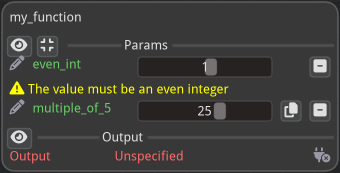

In [4]:
import fiatlight as fl

def even_int_validator(x: int) -> int:
    """This validator checks that the value is an even integer, and warns the user if it is not."""
    if x % 2 != 0:
        raise ValueError("The value must be an even integer")
    return x


def multiple_of_5_validator(x: int) -> int:
    """This validator will correct the user input to the closest multiple of 5."""
    return int(x / 5) * 5


def my_function(even_int: int = 0, multiple_of_5: int = 0) -> int:
    return even_int + multiple_of_5


fl.add_fiat_attributes(
    my_function,
    even_int__validator=even_int_validator,
    even_int__range=(-10, 10),
    multiple_of_5__validator=multiple_of_5_validator,
    multiple_of_5__range=(-100, 100)
)

fl.run(my_function, app_name="Validators")

> _Note: instead of using `fl.add_fiat_attributes`, you can also use the `@fl.with_fiat_attributes` decorator on top of the function to register its validators._


Example: Validators for Dataclass members
-----------------------------------------

The code below will produce the same GUI as the previous example, but this time using a dataclass.

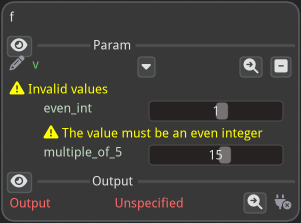

In [5]:
import fiatlight as fl
from dataclasses import dataclass  # optional, since fiatlight will add the @dataclass decorator
                                   # when using the @fl.dataclass_with_gui_registration decorator

def even_int_validator(x: int) -> int:
    """This validator checks that the value is an even integer, and warns the user if it is not."""
    if x % 2 != 0:
        raise ValueError("The value must be an even integer")
    return x


def multiple_of_5_validator(x: int) -> int:
    """This validator will correct the user input to the closest multiple of 5."""
    return int(x / 5) * 5


# Note: the decorator @fl.dataclass_with_gui_registration will also apply
#       the @dataclass decorator to the class
@fl.dataclass_with_gui_registration(
    even_int__validator=even_int_validator,
    even_int__range=(-10, 10),
    multiple_of_5__validator=multiple_of_5_validator,
    multiple_of_5__range=(-100, 100)
)
class MyData:
    even_int: int = 0
    multiple_of_5: int = 0


def f(v: MyData) -> MyData:
  return v

fl.run(f, app_name="Validators in a Dataclass")

> _Note: instead of using the decorator `@fl.dataclass_with_gui_registration` on top of the dataclass, you can also use the ` the function `fl.register_dataclass` to register the dataclass, and add fiat attributes, such as the validators._



Example: Validators for BaseModel members
-------------------------------------------

The code below will produce the same GUI as the previous example, but this time using a Pydantic model.
In this case we can also use standard Pydantic validators.

> Note: Fiatlight will also interpret the range from the less than (le) and greater than (ge) constraints in the Pydantic model.

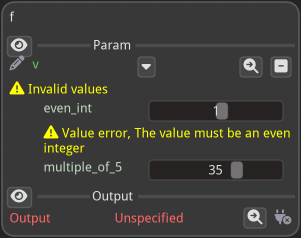

In [6]:
import fiatlight as fl
from pydantic import BaseModel, Field, field_validator

@fl.base_model_with_gui_registration()
class MyData(BaseModel):
  even_int: int = Field(0, ge=-10, le=10)
  multiple_of_5: int = Field(0, ge=-100, le=100)

  @field_validator("even_int")
  def even_int_validator(cls, v):
    if v % 2 != 0:
      raise ValueError("The value must be an even integer")
    return v

  @field_validator("multiple_of_5")
  def multiple_of_5_validator(cls, v):
    return int(v / 5) * 5

def f(v: MyData) -> MyData:
  return v

fl.run(f, app_name="Validators in a Pydantic model")

> _Note: instead of using the decorator `@fl.base_model_with_gui_registration` on top of the Pydantic model, you can also use the ` the function `fl.register_base_model` to register the Pydantic model, and add fiat attributes, such as the validators._